## Part 1: Data Loading and Initial Exploration (15 pts)

### Read Data

In [21]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8-dark') 

In [22]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
sou = pd.read_csv("data/SOTU.csv")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


#### Number of Speeches per President

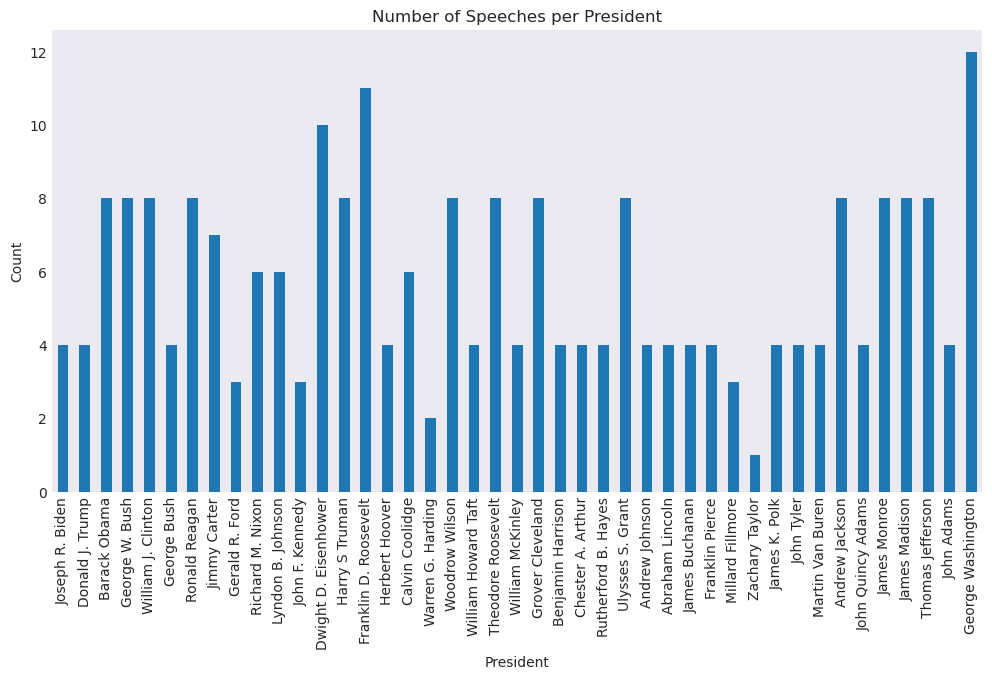

In [29]:
speech_counts = sou['President'].value_counts()
president_order = sou['President'].unique()
speech_counts = speech_counts.reindex(president_order)

speech_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Number of Speeches per President")
plt.xlabel("President")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.savefig("outputs/p1_speeches_per_president.png")
plt.show()

#### Number of Speeches per Year

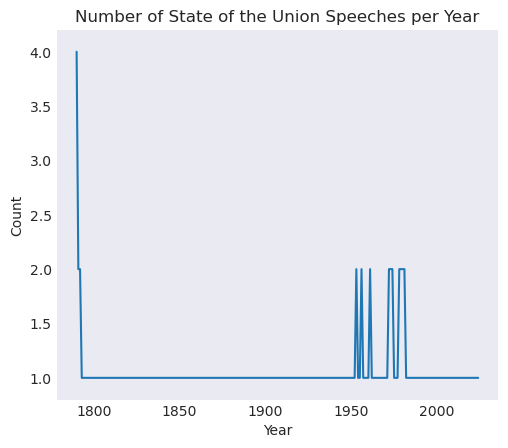

In [30]:
counts = sou['Year'].value_counts().sort_index()

counts.plot(
    kind='line',
    figsize=(5.7, 4.8)
)

plt.title("Number of State of the Union Speeches per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.ylim(0.8, 4.2)
plt.savefig("outputs/p1_speeches_per_year.png")
plt.show()

#### Word Count Distribution 

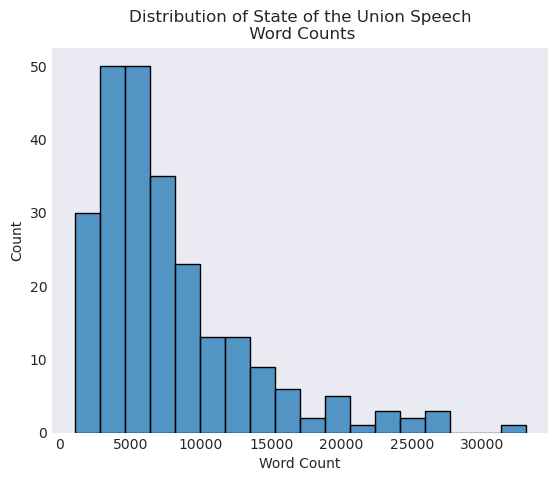

In [31]:
plt.figure(figsize=(6.4, 5))

sns.histplot(
    data=sou,
    x="Word Count",
    bins=18,
    edgecolor="black"
)

plt.title("Distribution of State of the Union Speech\n Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.savefig("outputs/p1_wordcount_distribution.png")
plt.show()

#### Word Count Distribution over Year

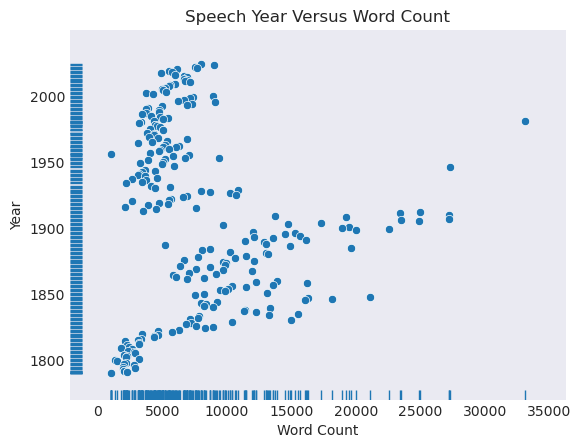

In [32]:
sns.scatterplot(
    data=sou,
    x="Word Count",
    y="Year"
)

sns.rugplot(
    data=sou,
    x="Word Count",
    y="Year",
    height=0.025
)

plt.title("Speech Year Versus Word Count")
plt.xlabel("Word Count")
plt.ylabel("Year")
plt.ylim(1770, None)
plt.savefig("outputs/p1_year_vs_wordcount.png")
plt.show()

#### Word Count Distribution per President

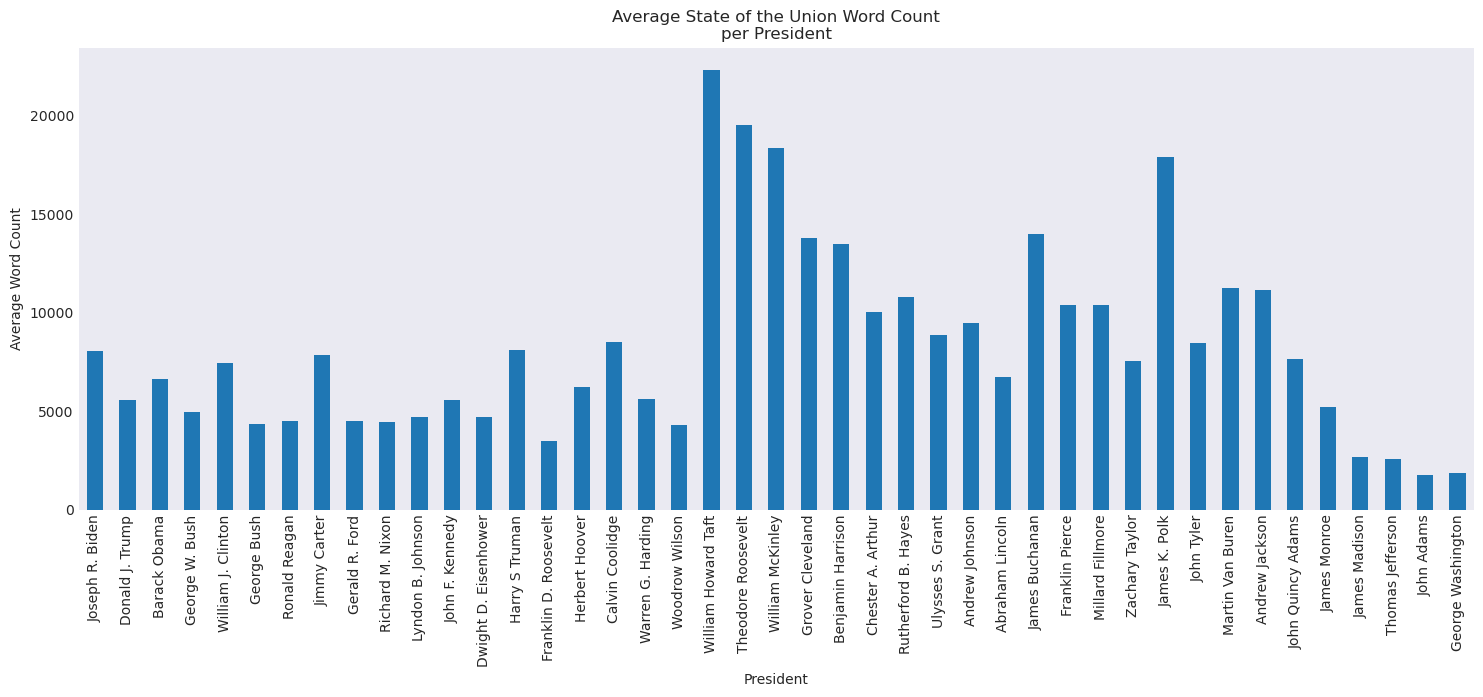

In [33]:
avg_wc = (
    sou.groupby("President")["Word Count"]
       .mean()
       .reindex(president_order)
)

plt.figure(figsize=(18, 6))

avg_wc.plot(kind="bar")

plt.title("Average State of the Union Word Count\nper President")
plt.xlabel("President")
plt.ylabel("Average Word Count")
plt.xticks(rotation=90)
plt.savefig("outputs/p1_mean_wordcount_per_president.png")
plt.show()